# Simulation of COVID pandemic on bilayer network


In [1]:
%load_ext autoreload
%autoreload 2

from scripts.network import create_bilayer_network
from scripts.epidemic_layer import initialize_epidemic
from scripts.virtual_layer import initialize_virtual

import networkx as nx

import scripts.visualization as viz

viz.load_matplotlib()
plt = viz.plt

N_AGENTS = 100
N_ADDITIONAL_VIRTUAL_LINKS = 300
INIT_INFECTED_FRACTION = 0.2
INIT_AWARE_FRACTION = 0.3

l1_layer, l2_layer = create_bilayer_network(N_AGENTS, N_ADDITIONAL_VIRTUAL_LINKS)

In [2]:
l1_layer_init = initialize_epidemic(l1_layer, INIT_INFECTED_FRACTION)
l2_layer_init = initialize_virtual(l2_layer, INIT_AWARE_FRACTION)

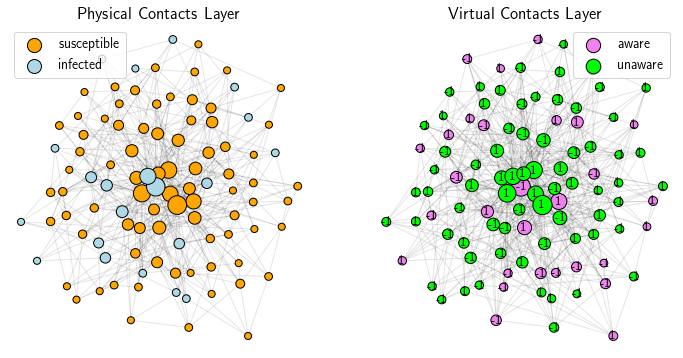

In [3]:
pos = nx.spring_layout(l1_layer, k=0.05, iterations=200)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

viz.draw_epidemic_layer(l1_layer_init, pos=pos, ax=axs[0], node_border_width=1.0)
axs[0].set_axis_off()
axs[0].set_title('Physical Contacts Layer')
axs[0].legend()

viz.draw_virtual_layer(l2_layer_init, pos=pos, ax=axs[1], node_border_width=1.0)
axs[1].set_title('Virtual Contacts Layer')
axs[1].set_axis_off()
axs[1].legend()

viz.save_figure("../plots/initial_network_state.png")

In [4]:
# TODO - simple l1 and l2 layer simulations ... 


In [50]:
from scripts.age_statistics import generate_from_age_gender_distribution

males = generate_from_age_gender_distribution(int(16e6), 'M')
females = generate_from_age_gender_distribution(int(16e6), 'F')

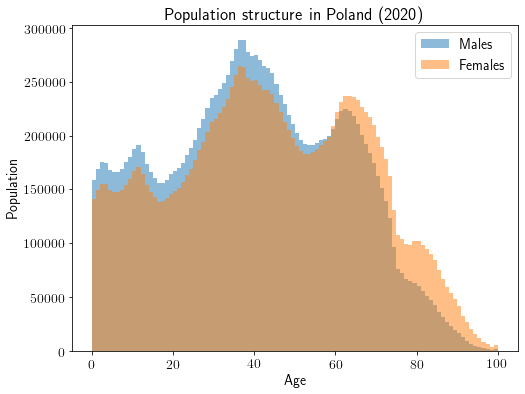

In [51]:
plt.hist(males, bins=100, alpha=0.5, label='Males')
plt.hist(females, bins=100, alpha=0.5, label='Females')
plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Population structure in Poland (2020)')
plt.legend()
plt.show()

38349830